In [15]:
import polars as pl
import pandas as pd
import plotly.express as px
import time

# Step 1: Data Loading

Data Being Used: [Link](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy/about_data)

Details of the data are a bit less important here as I'm using it entirely for benchmarking. Details in the link for the curious.

| Metric | Value |
|---|---|
| File Size | 1.17GB |
| Rows | 5.75 Million |
| Columns | 13 |

In [50]:
data_dir = "../data"
df = pl.read_csv(f"{data_dir}/read_data.csv")
df.head()

polars_read_duration,pandas_read_duration
f64,f64
0.634274,8.898374
0.612104,10.053863
0.623577,10.276404
0.616696,9.942205
0.644632,10.300371


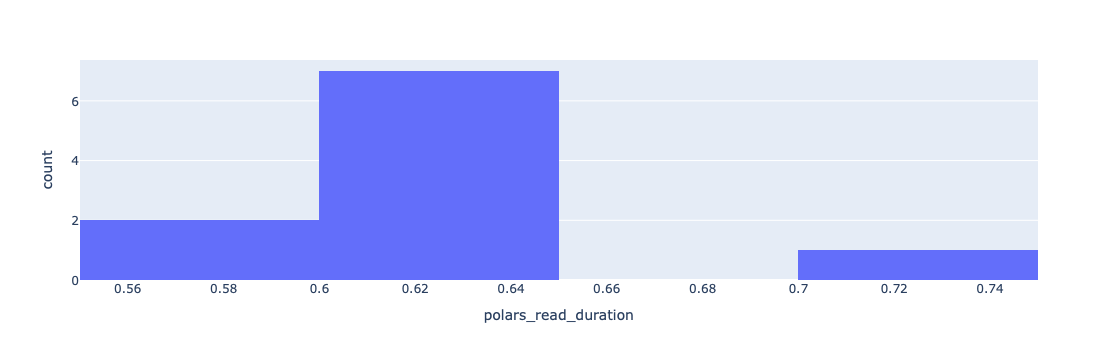

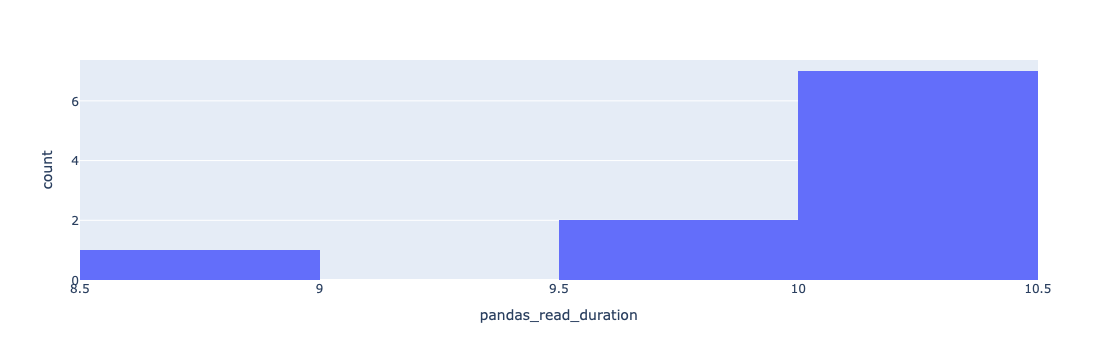

In [52]:
fig = px.histogram(df, x="polars_read_duration")
fig.show()
fig = px.histogram(df, x="pandas_read_duration")
fig.show()

In [47]:
df = (
    df
    .melt(
        value_vars = ["polars_read_duration", "pandas_read_duration"],
        variable_name="library", value_name="read_time"
    )
    .with_columns(
        pl.when(pl.col("library") == "polars_read_duration")
        # pl.when(pl.col("library") > 0.5)
        .then(pl.lit("Polars"))
        .otherwise(pl.lit("Pandas"))
        .alias("library")
    )
)

df

library,read_time
str,f64
"""Polars""",0.634274
"""Polars""",0.612104
"""Polars""",0.623577
"""Polars""",0.616696
"""Polars""",0.644632
…,…
"""Pandas""",10.267851
"""Pandas""",9.891176
"""Pandas""",10.002038


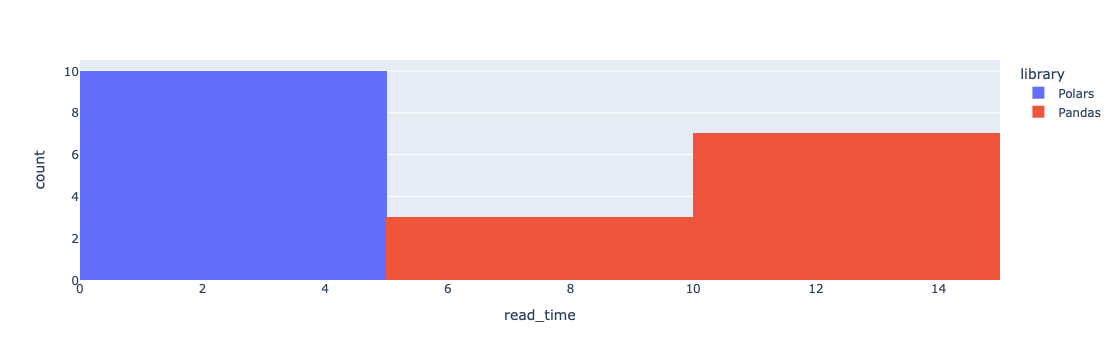

In [49]:
fig = px.histogram(df, x="read_time", color="library")
fig.show()

# Filtering Data

In [68]:
data_dir = "../data"
df = pl.read_csv(f"{data_dir}/filter_data.csv")
df.head()

polars_filtering_duration,pandas_filtering_duration
f64,f64
0.016626,0.252426
0.010555,0.031523
0.010279,0.031898
0.010633,0.03202
0.010649,0.031226


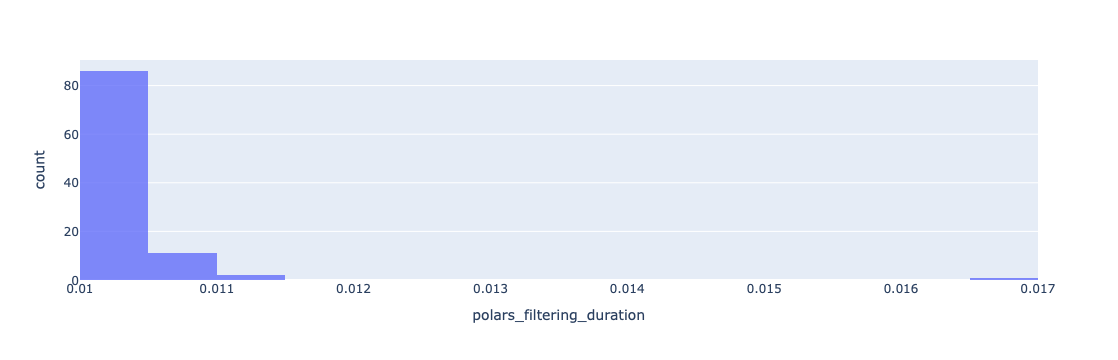

In [70]:
fig = px.histogram(df, x="polars_filtering_duration", opacity=0.8)
fig.show()

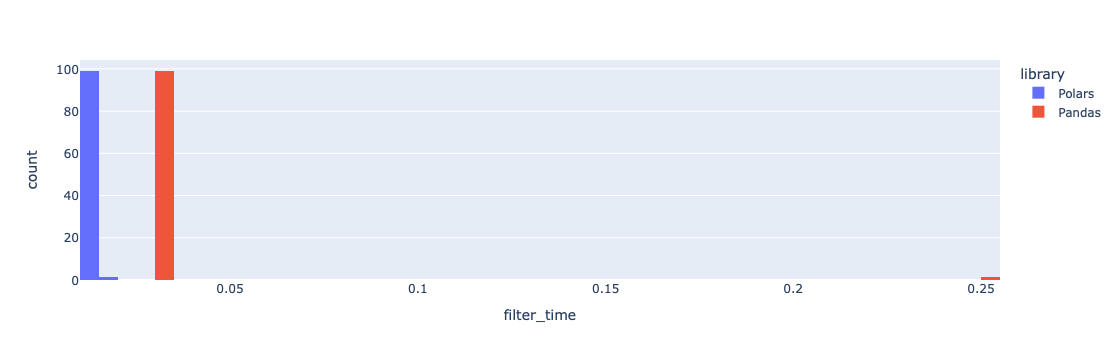

In [54]:
df = (
    df
    .melt(
        value_vars = ["polars_filtering_duration", "pandas_filtering_duration"],
        variable_name="library", value_name="filter_time"
    )
    .with_columns(
        pl.when(pl.col("library") == "polars_filtering_duration")
        # pl.when(pl.col("library") > 0.5)
        .then(pl.lit("Polars"))
        .otherwise(pl.lit("Pandas"))
        .alias("library")
    )
)

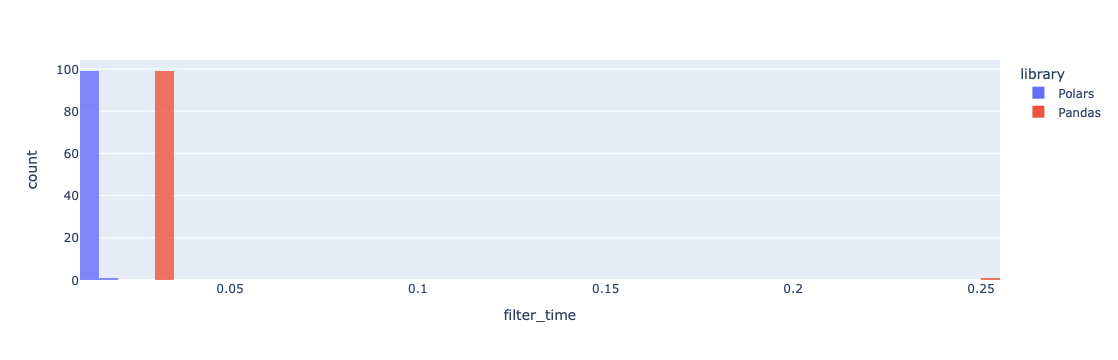

In [65]:
fig = px.histogram(df, x="filter_time", color="library", opacity=0.8)
fig.show()